In [ ]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

In [ ]:
from manim import *
import IPython

Manim Community v0.15.1

[03/20/22 16:37:41] INFO                                             ]8;id=540626;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=871168;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene_file_writer.py#715\715]8;;\
                             File ready at '/content/media/images/co                         
                             ntent/FunctionPlot_ManimCE_v0.15.1.png'                         
                                                                                             

                    INFO     Rendered FunctionPlot                               ]8;id=153053;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=169316;file:///usr/local/lib/python3.7/dist-packages/manim/scene/scene.py#241\241]8;;\
                             Played 0 animations                                             

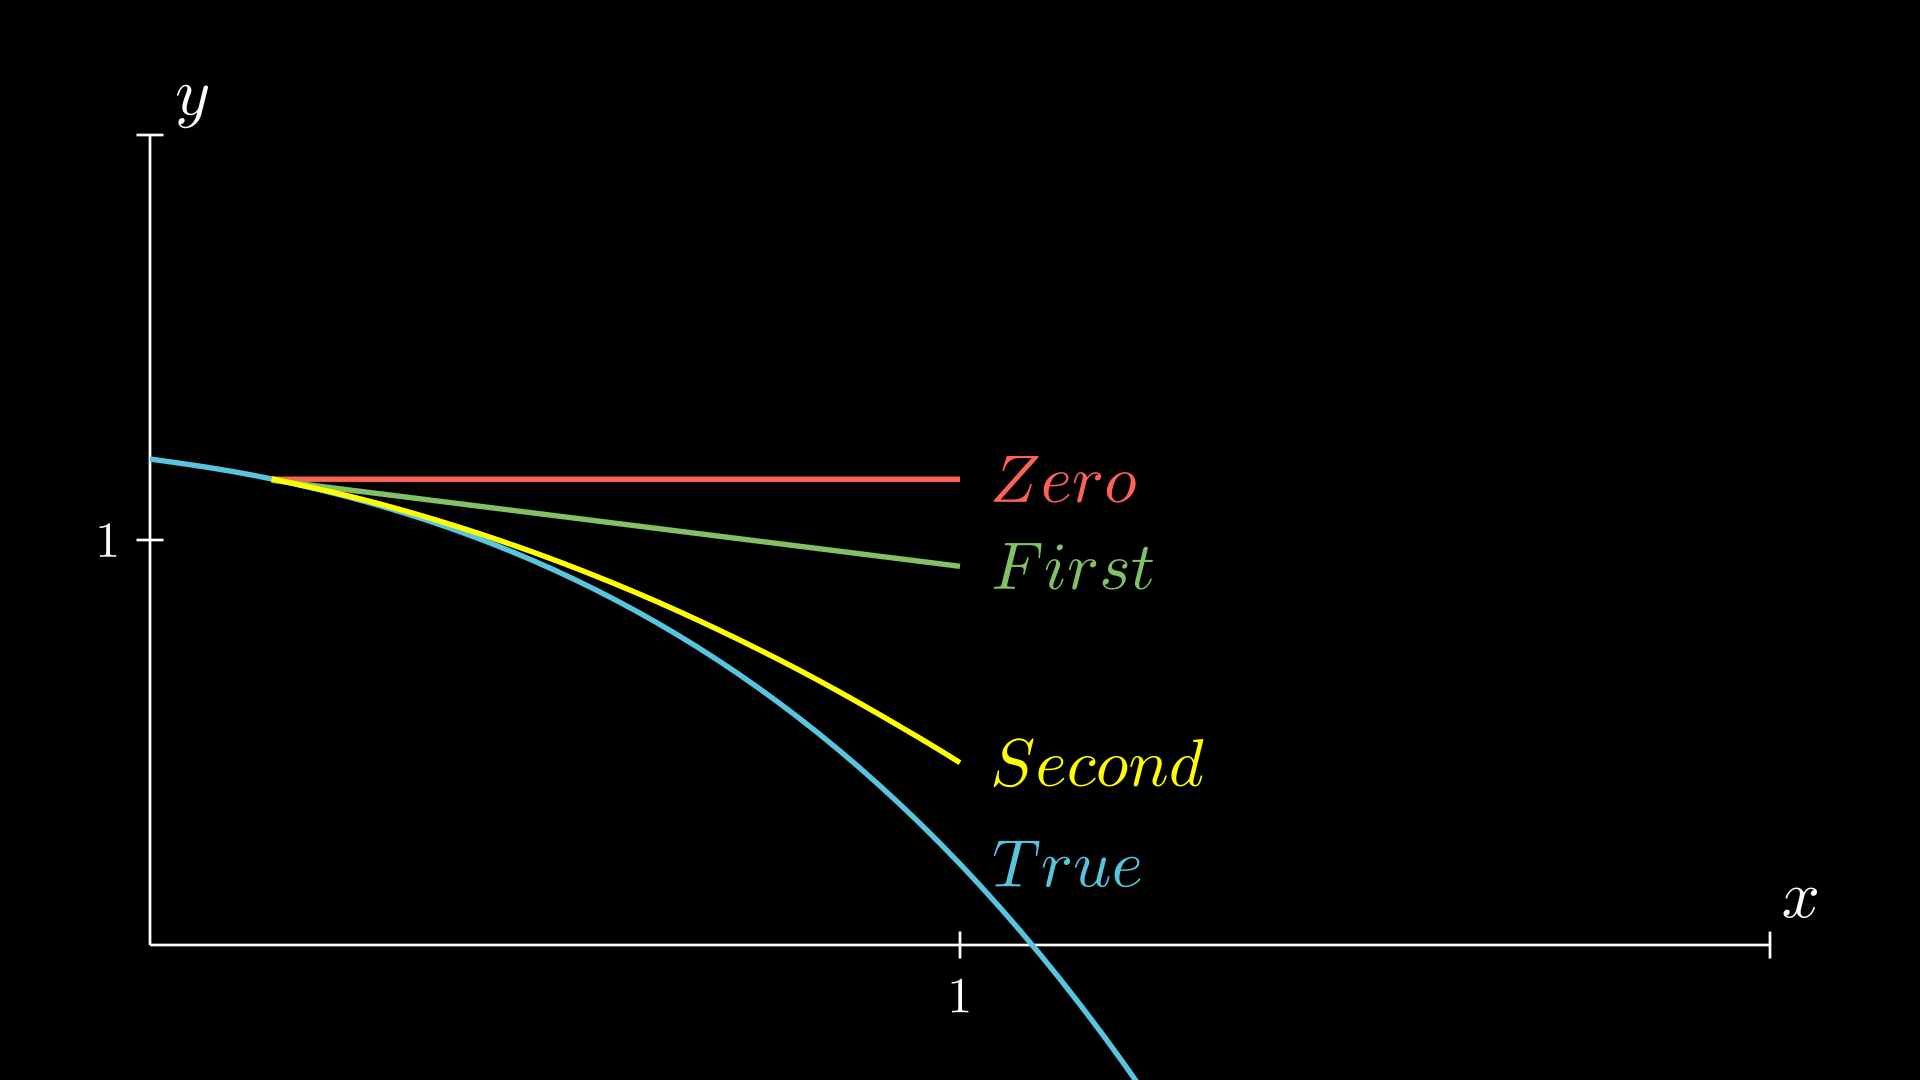

In [ ]:
%%manim FunctionPlot
class FunctionPlot(Scene):
      def construct(self):
        ax = Axes(
            x_range=[0, 2],
            y_range=[0, 2],
            x_axis_config={"numbers_to_include": [1]}, y_axis_config={"numbers_to_include": [1]},
            tips=False,
        )
        axes_labels = ax.get_axis_labels()
        curve_1 = ax.plot(lambda x: -0.1*x**4-0.15*x**3-0.5*x**2-0.25*x+1.2, x_range=[0, 4], color=BLUE_C)
        curve_2 = ax.plot(lambda x: 1.15,x_range=[0.15, 1], color=RED)
        curve_3 = ax.plot(lambda x: 1.185-0.25*x, x_range=[0.15, 1], color=GREEN)
        curve_4 = ax.plot(lambda x: 1.2-0.25*x-0.5*x**2, x_range=[0.15, 1], color=YELLOW)

        curve_1_label = ax.get_graph_label(curve_1, "True", x_val=1)
        curve_2_label = ax.get_graph_label(curve_2, "Zero", x_val=1)
        curve_3_label = ax.get_graph_label(curve_3, "First", x_val=1)
        curve_4_label = ax.get_graph_label(curve_4, "Second", x_val=1)

        plot = VGroup(ax, curve_1, curve_2, curve_3, curve_4)
        labels = VGroup(axes_labels,curve_1_label,curve_2_label,curve_3_label,curve_4_label)

        self.add(plot, labels)

In [ ]:
%%manim PlotParametricFunction
class PlotParametricFunction(Scene):
    def func(self, t):
        return np.array(((1/6)*np.sin(2*t)*(1+np.cos(80*t))*(1-(1/12)*np.sin(2*t)**8), (-1/2)*(2*t/PI-1)**2+(1/7)*np.sin(2*t)*np.sin(80*t)**3, 0))

    def construct(self):
        func = ParametricFunction(self.func, t_range = np.array([0, 3.15]), fill_opacity=0).set_color(RED)
        self.play(ApplyComplexFunction(func))
        self.wait()


In [ ]:
%%manim -qm -v WARNING Linear2

class Linear2(Scene):
    def construct(self):

        text = Tex("System of Linear equations").to_edge(UP, buff=0.3)
        self.play(Write(text))

        matrix1 = np.array([[3, 2, 18], [-1, 2,2]])
        matrix2 = np.array(matrix1[0])
        matrix3 = np.array([matrix1[1, 0] - matrix1[0, 0] * matrix1[1, 0] / matrix1[0, 0],matrix1[1, 1] - matrix1[0, 1] * matrix1[1, 0] / matrix1[0, 0],matrix1[1, 2] - matrix1[0, 2] * matrix1[1, 0] / matrix1[0, 0]])
        result = np.vstack((matrix2, matrix3))
        result = np.round(result, decimals=2)

        Ques=MathTex(r"\begin{cases}%sx_1+%sx_2=%s\\%sx_1+%sx_2=%s\end{cases}"%(matrix1[0,0],matrix1[0,1],matrix1[0,2],matrix1[1,0],matrix1[1,1],matrix1[1,2])).move_to(4.8*LEFT+UP*1.8)
        self.play(Write(Ques))




        arrow1=Vector(RIGHT).next_to(Ques,RIGHT)
        self.play(Write(arrow1))

        arrow1.txt=Tex("Matrix Form",font_size=20).next_to(arrow1,UP)
        self.play(Write(arrow1.txt))


        m1=Matrix([[matrix1[0,0],matrix1[0,1],"|",matrix1[0,2]],[matrix1[1,0],matrix1[1,1],"|",matrix1[1,2]]],
            v_buff=1.3,
            h_buff=0.8,
            bracket_h_buff=SMALL_BUFF,
            bracket_v_buff=SMALL_BUFF).move_to(0.5*RIGHT+UP*1.8)

        #m1=MathTex(r" \begin{bmatrix}%s & %s & %s & %s \\%s & %s & %s & %s \end{bmatrix} "%(matrix1[0,0],matrix1[0,1],"|",matrix1[0,2],matrix1[1,0],matrix1[1,1],"|",matrix1[1,2])).move_to(0.5*RIGHT+UP*1.8)


        self.play(Write(m1))
        self.wait()

        framebox_1 = SurroundingRectangle(m1.get_rows()[1], buff=0.1, color=GREEN)
        self.play(Create(framebox_1))


        arrow2=Vector(RIGHT).move_to(4.8*LEFT+DOWN)
        self.play(Write(arrow2))

        arrow2.txt=Tex("Forward elimination",font_size=20).next_to(arrow2,UP)
        self.play(Write(arrow2.txt))

        framebox_2 = SurroundingRectangle(arrow2.txt, buff=0.1, color=GREEN)
        self.play(ReplacementTransform(framebox_1,framebox_2))
        self.wait(1)

        m2=Matrix([[result[0,0],result[0,1],"|",result[0,2]],[result[1,0],result[1,1],"|",result[1,2]]],
            bracket_h_buff=SMALL_BUFF,
            bracket_v_buff=SMALL_BUFF).move_to(DOWN+LEFT)



        self.play(Write(m2))
        self.wait()

        framebox_3 = SurroundingRectangle(m2.get_rows()[1], buff=0.1, color=GREEN)
        self.play(ReplacementTransform(framebox_2,framebox_3))

        self.wait(2)


        self.remove(framebox_3)

        arrow3=Vector(RIGHT).next_to(m2,RIGHT)
        self.play(Write(arrow3))

        arrow3.txt=Tex("Final equations",font_size=20).next_to(arrow3,UP)
        self.play(Write(arrow3.txt))

        Ans1=MathTex(r"\begin{cases}%sx_1+%sx_2=%s\\%sx_2=%s\end{cases}"%(result[0,0],result[0,1],result[0,2],result[1,1],result[1,2]),font_size=35).move_to(4.8*RIGHT+DOWN)
        self.play(Write(Ans1))
        self.wait()

        arrow4=Vector(RIGHT).move_to(4.8*LEFT+3*DOWN)
        self.play(Write(arrow4))

        arrow4.txt=Tex("Final Answers",font_size=20).next_to(arrow4,UP)
        self.play(Write(arrow4.txt))
        x2=np.round(result[1,2]/result[1,1], decimals=2)
        x1=np.round((result[0,2]-x2*result[0,1])/result[0,0], decimals=2)

        Ans2=MathTex(r"\begin{cases}x_2=\frac{%s}{%s}\rightarrow x_2=%s \\{\overset{x_2=%s}{\longrightarrow}}   x_1=%s\end{cases}"%(result[1,2],result[1,1],x2,x2,x1),font_size=40).next_to(arrow4,RIGHT)
        self.play(Write(Ans2))
        self.wait()

        #self.remove(m1,m2,framebox_3,arrow1,arrow2,arrow1.txt,arrow2.txt,Ques,arrow3,arrow3.txt,Ans1,text)
        self.wait(2)

In [ ]:
from manim import *

class BooleanOperations(Scene):
    def construct(self):
        ellipse1 = Ellipse(
            width=4.0, height=5.0, fill_opacity=0.5, color=BLUE, stroke_width=10
        ).move_to(LEFT)
        ellipse2 = ellipse1.copy().set_color(color=RED).move_to(RIGHT)
        bool_ops_text = MarkupText("<u>Boolean Operation</u>").next_to(ellipse1, UP * 3)
        ellipse_group = Group(bool_ops_text, ellipse1, ellipse2).move_to(LEFT * 3)
        self.play(FadeIn(ellipse_group))

        i = Intersection(ellipse1, ellipse2, color=GREEN, fill_opacity=0.5)
        self.play(i.animate.scale(0.25).move_to(RIGHT * 5 + UP * 2.5))
        intersection_text = Text("Intersection", font_size=23).next_to(i, UP)
        self.play(FadeIn(intersection_text))

        u = Union(ellipse1, ellipse2, color=ORANGE, fill_opacity=0.5)
        union_text = Text("Union", font_size=23)
        self.play(u.animate.scale(0.3).next_to(i, DOWN, buff=union_text.height * 3))
        union_text.next_to(u, UP)
        self.play(FadeIn(union_text))

        e = Exclusion(ellipse1, ellipse2, color=YELLOW, fill_opacity=0.5)
        exclusion_text = Text("Exclusion", font_size=23)
        self.play(e.animate.scale(0.3).next_to(u, DOWN, buff=exclusion_text.height * 3.5))
        exclusion_text.next_to(e, UP)
        self.play(FadeIn(exclusion_text))

        d = Difference(ellipse1, ellipse2, color=PINK, fill_opacity=0.5)
        difference_text = Text("Difference", font_size=23)
        self.play(d.animate.scale(0.3).next_to(u, LEFT, buff=difference_text.height * 3.5))
        difference_text.next_to(d, UP)
        self.play(FadeIn(difference_text))